<a href="https://colab.research.google.com/github/ldtownsend/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
def mean(data):
  return sum(data) / len(data)

mean(sales)

3052.714285714286

In [4]:
def variance(data):
  x_bar = mean(data)
  numerator = []
  for i in data:
      x = (i - x_bar)**2
      numerator.append(x)
  
  return sum(numerator) / (len(data) - 1)

variance(sales)

214387.90476190473

In [5]:
# Just checking
np.var(sales)

183761.06122448976

In [6]:
def stdev(data):
  return variance(data)**.5

stdev(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers =  [127, 80, 105, 92, 120, 115, 93]

In [8]:
def covar(datax, datay):
  x_bar = mean(datax)
  y_bar = mean(datay)
  numerator = []
  for k in range(len(datax)):
    numerator.append((datax[k]-x_bar)*(datay[k] - y_bar))
  return sum(numerator)/(len(datax) - 1)

covar(sales, customers)

7604.357142857142

In [9]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [10]:
stdev(customers)

17.057326313123664

In [11]:
covar(sales, customers)/(stdev(sales)*stdev(customers))

0.9628339778148909

In [12]:
# Correlation coefficient = cov(A,B) / (std(a) * std(b))
7604.3571428 / (stdev(sales)*stdev(customers))

0.9628339778076557

In [13]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
import numpy as np

In [15]:
! wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2019-08-28 03:05:57--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.02s   

2019-08-28 03:05:57 (6.13 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [16]:
df = pd.read_csv('titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [17]:
df = df.drop('Unnamed: 0', axis=1)
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

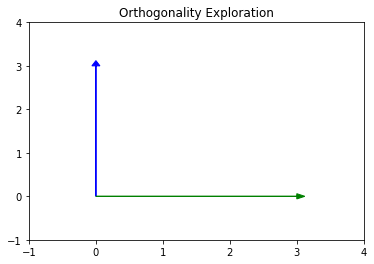

In [18]:
import matplotlib.pyplot as plt

vector_a = [0, 3]
vector_b = [3, 0]

plt.arrow(0,0, vector_a[0], vector_a[1], head_width=.12, head_length=.12, color = 'blue')
plt.arrow(0,0, vector_b[0], vector_b[1], head_width=.12, head_length=.12, color = 'green')
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.title('Orthogonality Exploration')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [19]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b) #No, their dot product is not zero.
a.shape

(3,)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [20]:
# Each layer of brackets adds an additional dimension. 
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.matmul(c,c.T))

# They are all the same.

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k} 
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [21]:
f = np.array([4, 12, 11, 9, 2])

f_norm = np.linalg.norm(f)

f_unit = f*(1/f_norm)

f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

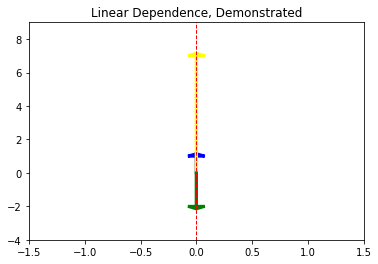

In [22]:
plt.xlim(-1.5,1.5)
plt.ylim(-4,9)

# Original Vector
v = [0,1]

# Scaled Vector
v2 = np.multiply(v, 7)
v3 = np.multiply(v, -2)

# Get Vals for L
axes = plt.gca()
y_vals = np.array(axes.get_ylim())
x_vals = 0*y_vals

# Plot Vectors
plt.plot(x_vals, y_vals, '--', color='r', linewidth=1)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.15, head_length=.15, color='blue')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.15, head_length=.15, color='yellow')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.15, head_length=.15, color='green')

plt.title("Linear Dependence, Demonstrated")
plt.show()

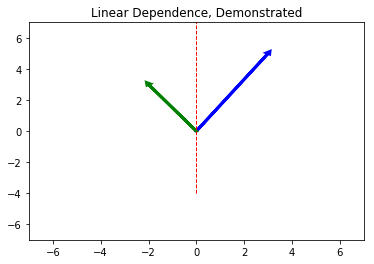

In [23]:
plt.xlim(-7,7)
plt.ylim(-7,7)

# Vectors
v4 = [3,5]
v5 = [-2,3]

# Plot Vectors
plt.plot(x_vals, y_vals, '--', color='r', linewidth=1)
plt.arrow(0,0, v4[0], v4[1], linewidth=3, head_width=.15, head_length=.15, color='blue')
plt.arrow(0,0, v5[0], v5[1], linewidth=3, head_width=.15, head_length=.15, color='green')

plt.title("Linear Dependence, Demonstrated")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

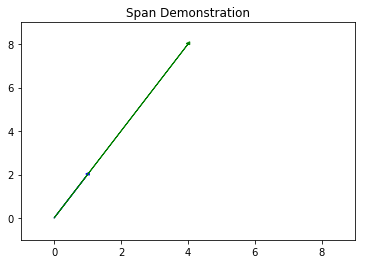

In [24]:
g = np.array([1,2])
h = np.array([4,8])

plt.arrow(0,0, g[0], g[1], head_width=.12, head_length=.12, color = 'blue')
plt.arrow(0,0, h[0], h[1], head_width=.12, head_length=.12, color = 'green')
plt.xlim(-1,9)
plt.ylim(-1,9)
plt.title('Span Demonstration')
plt.show()

# The span is 1
# 4g = h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [25]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

array = np.array([l + m + n]).reshape(3,3).T

np.linalg.matrix_rank(array)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



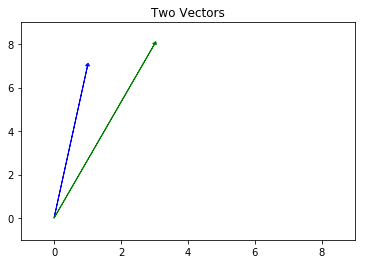

In [26]:
vector_o = [1, 7]
vector_p = [3, 8]

plt.arrow(0,0, vector_o[0], vector_o[1], head_width=.12, head_length=.12, color = 'blue')
plt.arrow(0,0, vector_p[0], vector_p[1], head_width=.12, head_length=.12, color = 'green')
plt.xlim(-1,9)
plt.ylim(-1,9)
plt.title('Two Vectors')
plt.show()

# The span is 1
# 4g = h

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [27]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

print(np.linalg.matrix_rank(P), "is the Rank of P.")

3 is the Rank of P.


## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Listed as a stretch goal.

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

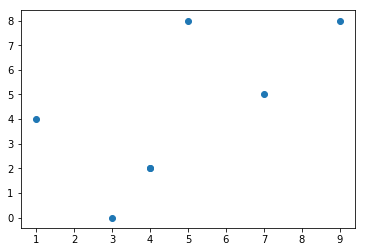

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()